In [1]:
pip install pandas yfinance matplotlib


In [3]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [4]:
# Function to calculate Williams %R
def williams_r(df, period=14):
    df['H-N'] = df['High'].rolling(window=period).max()
    df['L-N'] = df['Low'].rolling(window=period).min()
    df['%R'] = -100 * ((df['H-N'] - df['Close']) / (df['H-N'] - df['L-N']))
    return df

In [6]:

# Function to calculate MACD
def macd(df, short_window=12, long_window=26, signal_window=9):
    df['EMA12'] = df['Close'].ewm(span=short_window, adjust=False).mean()
    df['EMA26'] = df['Close'].ewm(span=long_window, adjust=False).mean()
    df['MACD'] = df['EMA12'] - df['EMA26']
    df['Signal_Line'] = df['MACD'].ewm(span=signal_window, adjust=False).mean()
    return df


In [7]:

# Function to generate buy/sell signals
def generate_signals(df):
    df['Buy_Signal'] = ((df['%R'] < -80) & (df['MACD'] > df['Signal_Line']))
    df['Sell_Signal'] = ((df['%R'] > -20) & (df['MACD'] < df['Signal_Line']))
    return df


In [8]:
# Download historical stock data
ticker = 'AAPL'  # Example ticker
df = yf.download(ticker, start='2020-01-01', end='2023-01-01')

[*********************100%%**********************]  1 of 1 completed


In [9]:
# Calculate indicators
df = williams_r(df)
df = macd(df)

In [10]:
# Generate signals
df = generate_signals(df)

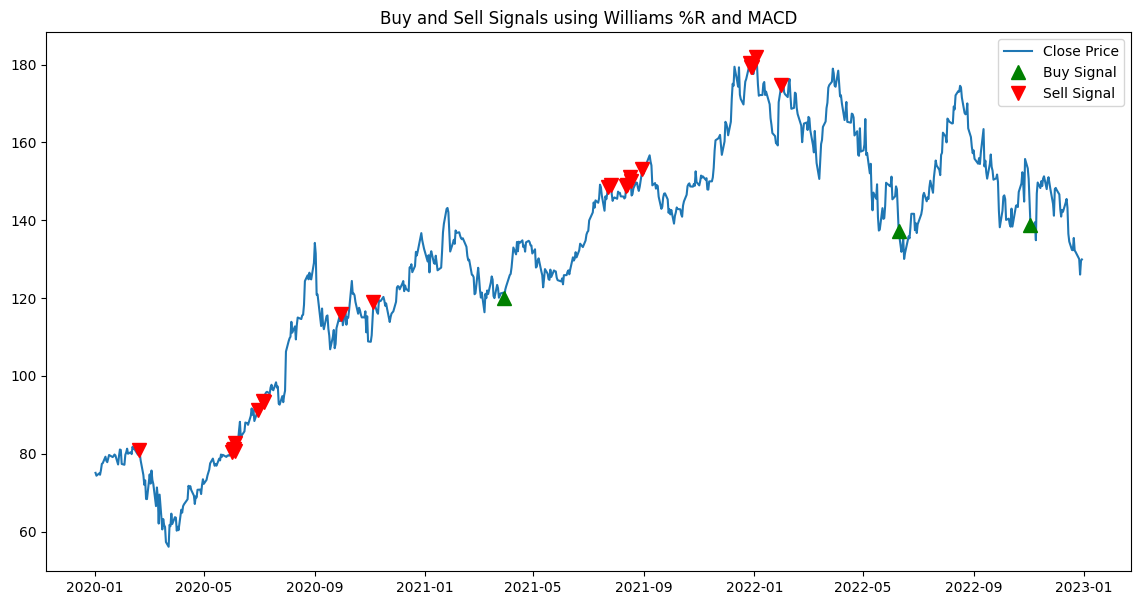

In [11]:

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price')
plt.plot(df[df['Buy_Signal']]['Close'], '^', markersize=10, color='g', lw=0, label='Buy Signal')
plt.plot(df[df['Sell_Signal']]['Close'], 'v', markersize=10, color='r', lw=0, label='Sell Signal')
plt.title('Buy and Sell Signals using Williams %R and MACD')
plt.legend()
plt.show()
